<div align="center">
    <img src="../img/Telecom.jpg" width="800">
</div>


## Proyecto

En este proyecto realizaremos una exploración de los datos para conocerlos, luego de entenderlos, prepararemos los datos para realizar predicciones con un modelo de machine learning supervisado. Quizás apliquemos modelos más avanzados no supervisados para lograr una mejor precisión en nuestra predicción, si hace falta

## Objetivo

El objetivo de este proyecto es predecir si un cliente de telecomunicaciones abandonará el servicio o no.

## Contenido

Este dataset contiene información sobre:

- Clientes que contrataron un servicio con la compañía de telecomunicaciones.
  
- El tiempo que cada cliente lleva con el servicio contratado, métodos de pago y cargos mensuales.
  
- Información sobre el cliente, como la edad, si tiene pareja y o cargas familiares.

# Analisis Exploratorio

## Librerias

In [1]:
# tratado de datos
import pandas as pd
import numpy as np

# Estadistica

from scipy.stats import chi2_contingency

# Visualizacion 

import matplotlib.pyplot as plt
import seaborn as sns

## Carga y revision de datos

In [2]:
# Importamos los datos y guardamos en una variable

df = pd.read_csv('../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Vemos las primeras lineas para revisar por encima el df

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Vemos la informacion de nuestro df Columnas, Filas, Tamanho de dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Nuestro dataset contiene 7043 filas y 21 columnas, con un uso de memoria de aproximadamente 1.1 MB. Hasta el momento, no hemos encontrado valores nulos. En cuanto a los tipos de datos, cambiaremos el formato de la columna 'SeniorCitizen' a object, y 'TotalCharges' a float. También revisaremos si existen duplicados en nuestro dataset

In [20]:
# Sustituimos los valores 0 y 1 de nuestra columna de jubilados  a 'No' y 'Yes para luego pasarlas a tipo Object

dicc = {0 : 'No',
        1 : 'Yes'}


df['SeniorCitizen'] = df['SeniorCitizen'].map(dicc)

In [21]:
# Revisamos NaNs en nuestra columna ya que no podemos pasarlos a float 

df['TotalCharges'].isna().sum()

np.int64(0)

In [22]:
# Revisamos los espacios vacios 

df[df['TotalCharges'].str.strip() == '']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Al intentar cambiar nuestra columna 'TotalCharges' a float, nos dimos cuenta de que no nos lo permitía porque existían filas en blanco. También notamos que estas filas vacías se debían a que los clientes eran muy nuevos y, aunque tengan contratos de 2 o 3 años, aún no han cumplido el primer mes.

In [23]:
# Sustituimos los espacios vacios por 1 si el tiempo de permanenciaesta es igual a 0 y el total de cargos esta vavio 

df.TotalCharges = df.apply(lambda x:
                           x['MonthlyCharges'] * 1 if x['TotalCharges'] == ' ' and x['tenure'] == 0
                           else x['TotalCharges'], axis=1)


In [24]:
# Le damos formato flotante a la columna 'TotalCharges'

df['TotalCharges'] = df['TotalCharges'].astype(float).round(2)

In [25]:
# Revisamos si existen duplicados en todo el df en general 

df.duplicated().sum()

np.int64(0)

In [26]:
# Agregamos la columna customerID al indice 

df.set_index('customerID',inplace=True)

En resumen, lo que hemos hecho hasta el momento es conocer nuestros datos de forma general, darles el formato correcto a las columnas que lo requerían y sustituir valores numéricos por strings para que nos ayuden en nuestro análisis exploratorio.

- El dataset contiene 7043 filas y 21 columnas.
  
- No hay valores NaN.
  
- No hay duplicados.
  
- Todos los tipos de datos están correctos.
  
- Con este reconocimiento de los datos, avanzamos al análisis exploratorio de nuestro dataset.

## Resumen Estadistico

In [27]:
# Hacemos un resumen estadistico de nuestros valores numericos para ver como estan distribuidos los datos 

df.select_dtypes('number').describe().round(2)

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.80
std,24.56,30.09,2266.73
min,0.00,18.25,18.80
25%,9.00,35.50,398.55
50%,29.00,70.35,1394.55
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


En este resumen estadístico volvemos a corroborar la ausencia de nulos, ya que el conteo de nuestros valores está completo.

- En cuanto al tiempo con el servicio contratado, podemos ver que el promedio de los clientes es de 32 meses. El 25% de los clientes son nuevos y llevan menos de 1 año con la empresa, el 50% tiene hasta 29 meses de antigüedad, y el 75% de los clientes lleva más de 2 años con la empresa.
  
- En el cargo mensual, observamos que el promedio por cliente es de 64. Sin embargo, los datos están bastante dispersos, lo que indica una alta varianza. Podríamos decir que los clientes con más antigüedad pagan más que los nuevos.
  
- En los cargos totales vemos que el promedio de las facturas ronda los 2279, y hay una gran diferencia entre los clientes nuevos y los de mayor antigüedad.
Todo esto lo analizaremos más a fondo más adelante con gráficas.


## Analisis Univariado

Text(0.5, 1.0, 'Cargos Totales')

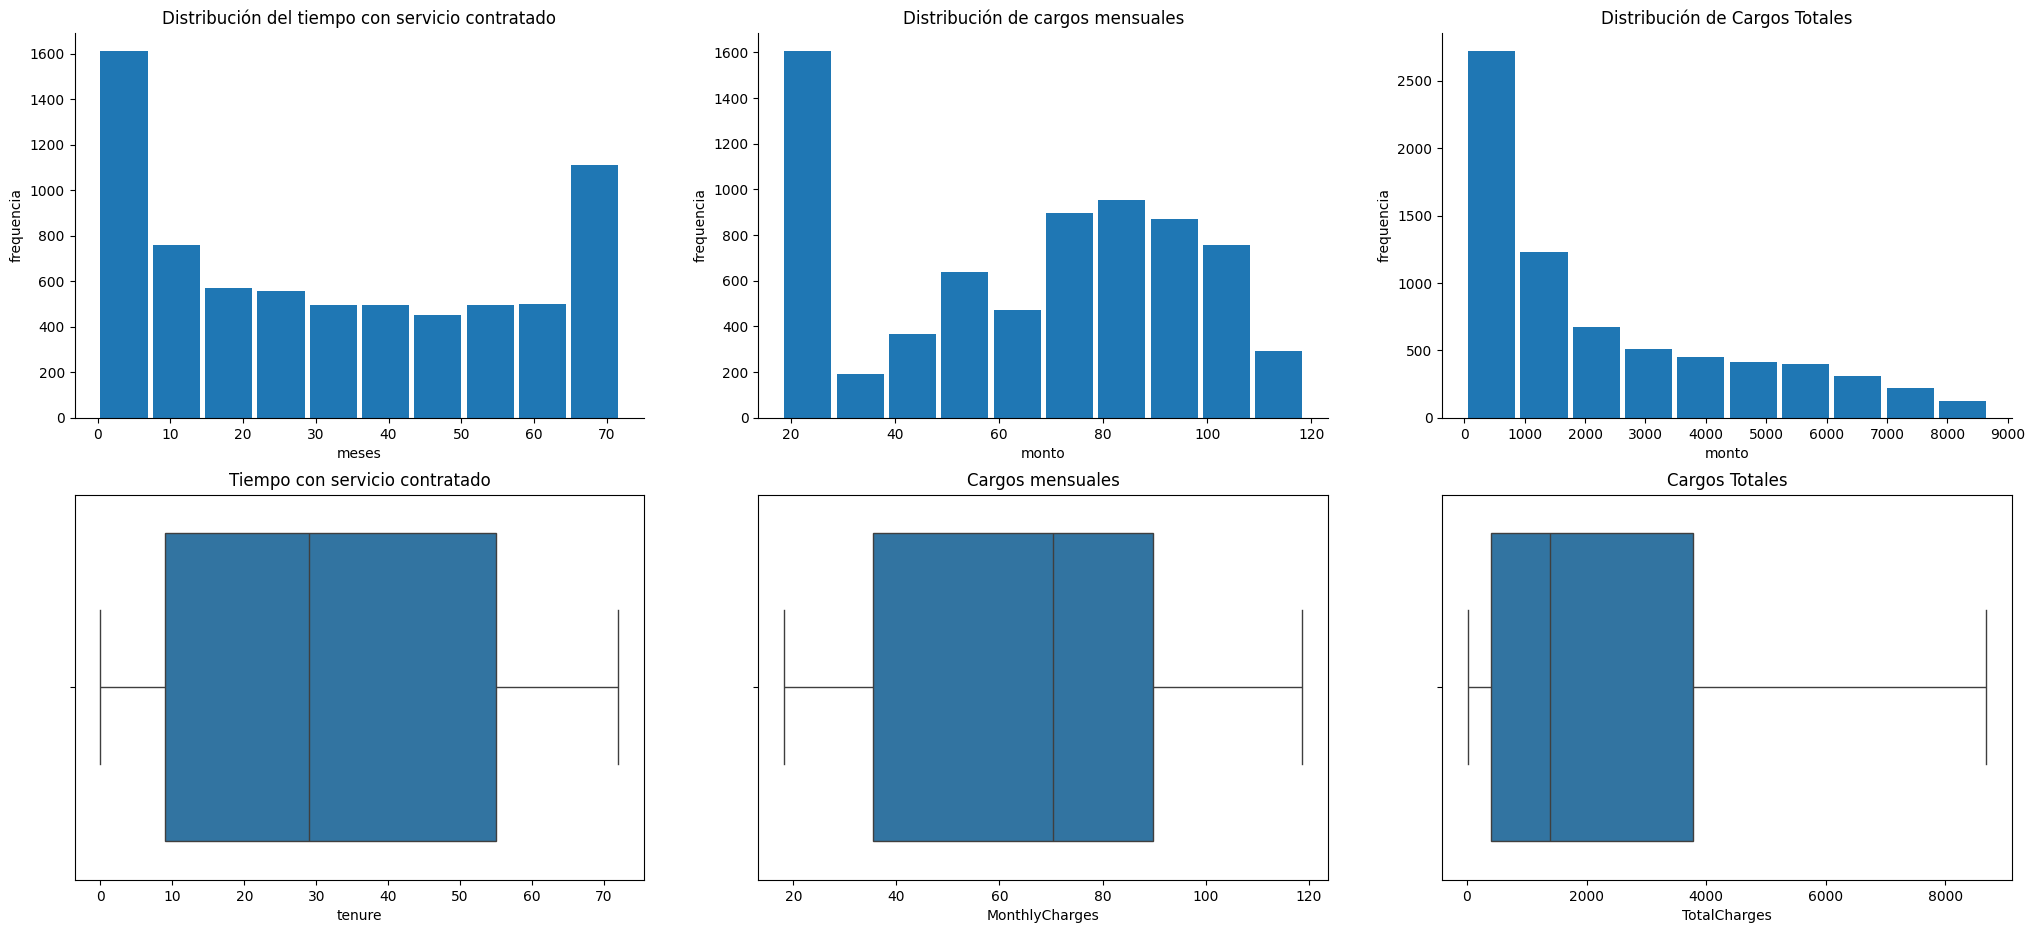

In [28]:
# Hacemos una tabla de graficos  de dos filas y 3 columnas y 25 de ancho y  1 de alto

fig, ax = plt.subplots(2,3,figsize=(25,11))

# Graficos para ver distibucion 

df.tenure.hist(ax=ax[0,0],rwidth=0.9)

ax[0,0].set_title('Distribución del tiempo con servicio contratado')
ax[0,0].set_xlabel('meses')
ax[0,0].set_ylabel('frequencia')
ax[0,0].grid(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)


df.MonthlyCharges.hist(ax=ax[0,1],rwidth=0.9)

ax[0,1].set_title('Distribución de cargos mensuales')
ax[0,1].set_xlabel('monto')
ax[0,1].set_ylabel('frequencia')
ax[0,1].grid(False)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)


df.TotalCharges.hist(ax=ax[0,2],rwidth=0.9)

ax[0,2].set_title('Distribución de Cargos Totales')
ax[0,2].set_xlabel('monto')
ax[0,2].set_xticks(np.arange(0, 9001, 1000))
ax[0,2].set_ylabel('frequencia')
ax[0,2].grid(False)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)

# Boxplots para ver los outliers

sns.boxplot(data=df['tenure'],ax=ax[1,0],orient='h')
ax[1,0].set_title('Tiempo con servicio contratado')

sns.boxplot(data=df['MonthlyCharges'],ax=ax[1,1],orient='h')
ax[1,1].set_title('Cargos mensuales')

sns.boxplot(data=df['TotalCharges'],ax=ax[1,2],orient='h')
ax[1,2].set_title('Cargos Totales')

Aquí vemos la distribución de:

- El tiempo con el servicio contratado: presenta una distribución bimodal, donde podemos decir que existen dos grupos dominantes en el dataset: los clientes nuevos y los clientes con mayor tiempo con el servicio.
  
- Cargos mensuales: observamos una distribución multimodal, ya que existen al menos dos picos. Podemos decir que hay tres grupos según la cantidad pagada por cliente: los que pagan entre 20 y 40 mensuales, los que pagan entre 40 y 60, y los que pagan entre 60 y 120.
  
- Cargos totales: se aprecia un sesgo a la derecha, lo que indica que la mayoría de los clientes ha pagado mucho más que otros. Esto puede deberse al tiempo que llevan contratando el servicio.
  
- Por otro lado, graficamos un boxplot para cada columna con el fin de identificar outliers. No se detectaron valores atípicos, aunque la columna TotalCharges muestra bastante dispersión.

In [29]:
# Seleccionamos las columnas tipo object

categoricas = df.select_dtypes(include=['object']).columns  


# mostramos la categoria mas frecuente, la frecuencia con que se repite cada categoria y la representacion en % sobre el total 

dominio_por_categoria = pd.DataFrame({'Categorias Dominantes': df[categoricas].mode().iloc[0],
                                      'Frecuencia': df[categoricas].apply(lambda x: x.value_counts().iloc[0]),
                                      '%': df[categoricas].apply(lambda x: x.value_counts(normalize=True).iloc[0]) * 100})

# horganizamos de forma decendente 

dominio_por_categoria.sort_values(by='%', ascending=False)

,Categorias Dominantes,Frecuencia,%
PhoneService,Yes,6361,90.316626
SeniorCitizen,No,5901,83.785319
Churn,No,5174,73.463013
Dependents,No,4933,70.041176
PaperlessBilling,Yes,4171,59.221922
Contract,Month-to-month,3875,55.019168
Partner,No,3641,51.696720
gender,Male,3555,50.475650
OnlineSecurity,No,3498,49.666335
TechSupport,No,3473,49.311373


En esta pequeña tabla podemos observar qué categoría domina por columna, lo que nos permite sacar algunas conclusiones:

- El 90% de los clientes posee un contrato de telefonía.

- La mayoría de los clientes no son jubilados; los jubilados representan solo un 16% aproximadamente.
  
- La clientela que no abandona la compañía tiene un peso del 73%.
  
- Solo el 30% de los clientes tiene cargas familiares.
  
- entre otros

## Analisis bivariado

Text(0.5, 1.0, 'Jubilados vs Churn')

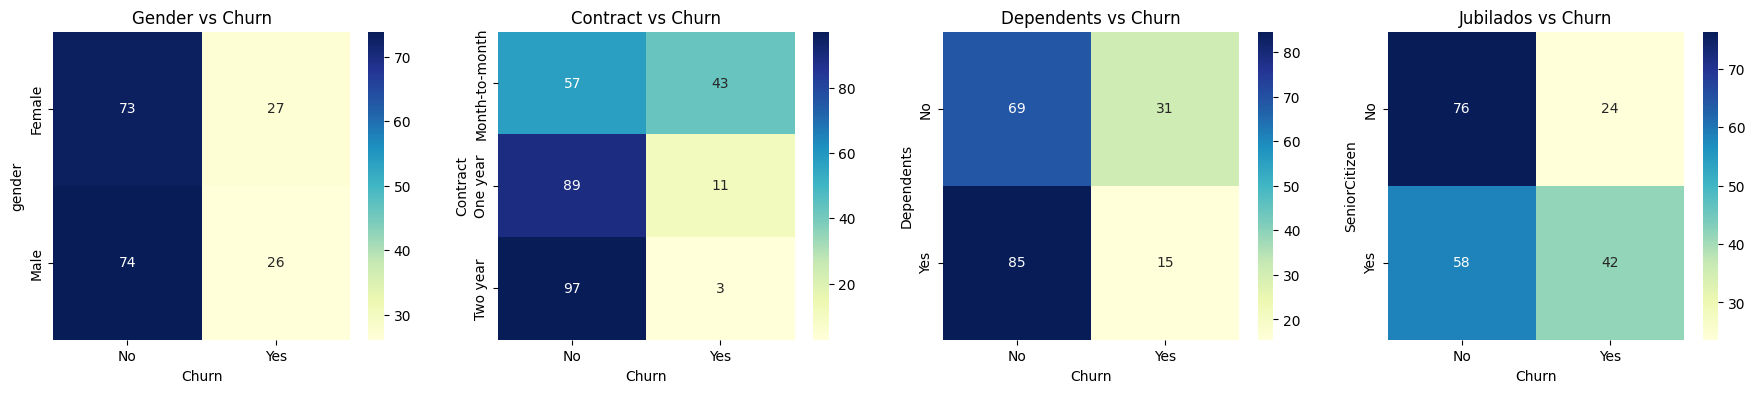

In [30]:
# Hacemos una tabla de donde agregaremos varios heatmaps (tabla de contingencia)

fig , ax = plt.subplots(1,4, figsize=(22,4))

sns.heatmap(pd.crosstab(df['gender'], df['Churn'],normalize='index')*100, 
                        annot=True,fmt='.0f', cmap='YlGnBu',linecolor="black",
                        ax=ax[0])
ax[0].set_title('Gender vs Churn')


sns.heatmap(pd.crosstab(df['Contract'], df['Churn'],normalize='index')*100, 
            annot=True,fmt='.0f', cmap='YlGnBu',linecolor="black",
            ax=ax[1])
ax[1].set_title('Contract vs Churn')


sns.heatmap(pd.crosstab(df['Dependents'], df['Churn'],normalize='index')*100,
            annot=True,fmt='.0f', cmap='YlGnBu',linecolor="black",
            ax=ax[2])
ax[2].set_title('Dependents vs Churn')


sns.heatmap(pd.crosstab(df['SeniorCitizen'], df['Churn'],normalize='index')*100,
            annot=True,fmt='.0f', cmap='YlGnBu',linecolor="black",ax=ax[3])
ax[3].set_title('Jubilados vs Churn')



En estas tablas de contingencia analizamos cómo cada categoría influye en si los clientes abandonan o no el servicio:

-   Lo primero que notamos es que el género está bastante parejo y no parece que ser hombre o mujer influya mucho en la decisión del cliente.
  
-   En cuanto a los clientes que contratan servicios mes a mes, solo un 57% continúa contratando alguno de los servicios, mientras que el 43% abandona. Esto es bastante significativo y nos deja claro que es un factor clave a tener en cuenta para predecir si un cliente puede abandonar o no.
  
-   El 31% de los clientes sin dependientes suele desistir del servicio, lo cual es bastante alto en comparación con los que sí tienen dependientes, donde solo un 15% abandona. Esto nos lleva a la conclusión de que si un cliente tiene cargas familiares, es más propenso a quedarse.
  
-   Al analizar la tabla de contingencia de los jubilados, notamos que hay un gran porcentaje de abandono: el 42% de los jubilados deja los servicios, lo que nos lleva a pensar que esta variable influye bastante en lo que vamos a predecir con machine learning.

## Analisis multivariado

En este apartado evaluaremos como se comportan algunas variables contra nuestro objetivo a predecir en nuestro modelo de maching learning que es la columna 'churn'

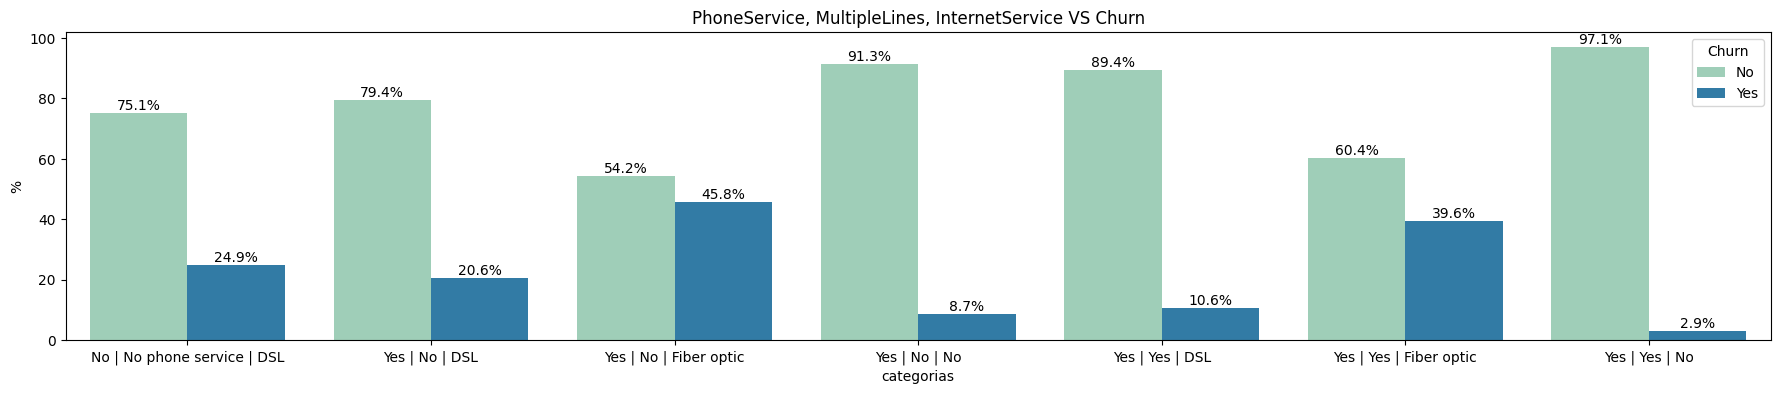

In [31]:
# Definimos la figura

plt.figure(figsize=(22,4))

# Agrupamos las categorias que queremos comparar juntas

grupo_1 = df.groupby(['PhoneService', 'MultipleLines', 'InternetService', 'Churn']).size().reset_index(name='count')

# Vemos el  peso que representa cada grupo por desertores o clientes fieles

grupo_1['%'] = grupo_1.groupby(['PhoneService', 'MultipleLines', 'InternetService'])['count'].transform(lambda x: x / x.sum() * 100)

# Concatenamos los nombres de las categorias

grupo_1['categorias'] = grupo_1['PhoneService'] + ' | ' + grupo_1['MultipleLines'] + ' | ' + grupo_1['InternetService']

# Graficamos 

fig_barras = sns.barplot(data=grupo_1,
                         x='categorias',
                         y='%', hue='Churn',
                         palette='YlGnBu')

# Agregamos los lables a cada columna 

for container in fig_barras.containers:
    fig_barras.bar_label(container, fmt='%.1f%%')

plt.title('PhoneService, MultipleLines, InternetService VS Churn')

plt.show()

Aquí mostramos clientes que tienen contratados algunos de estos servicios: PhoneService, MultipleLines e InternetService, con el fin de detectar algún patrón que lleve a nuestros clientes a abandonar los servicios.

Lo primero que notamos es que la mayoría de los clientes tiene servicios de telefonía contratados. Sin embargo, algo que nos llama mucho la atención es que los clientes que tienen fibra óptica presentan un nivel más alto de abandono en comparación con las otras variables, lo que nos lleva a considerarla como una variable que aporta bastante información.

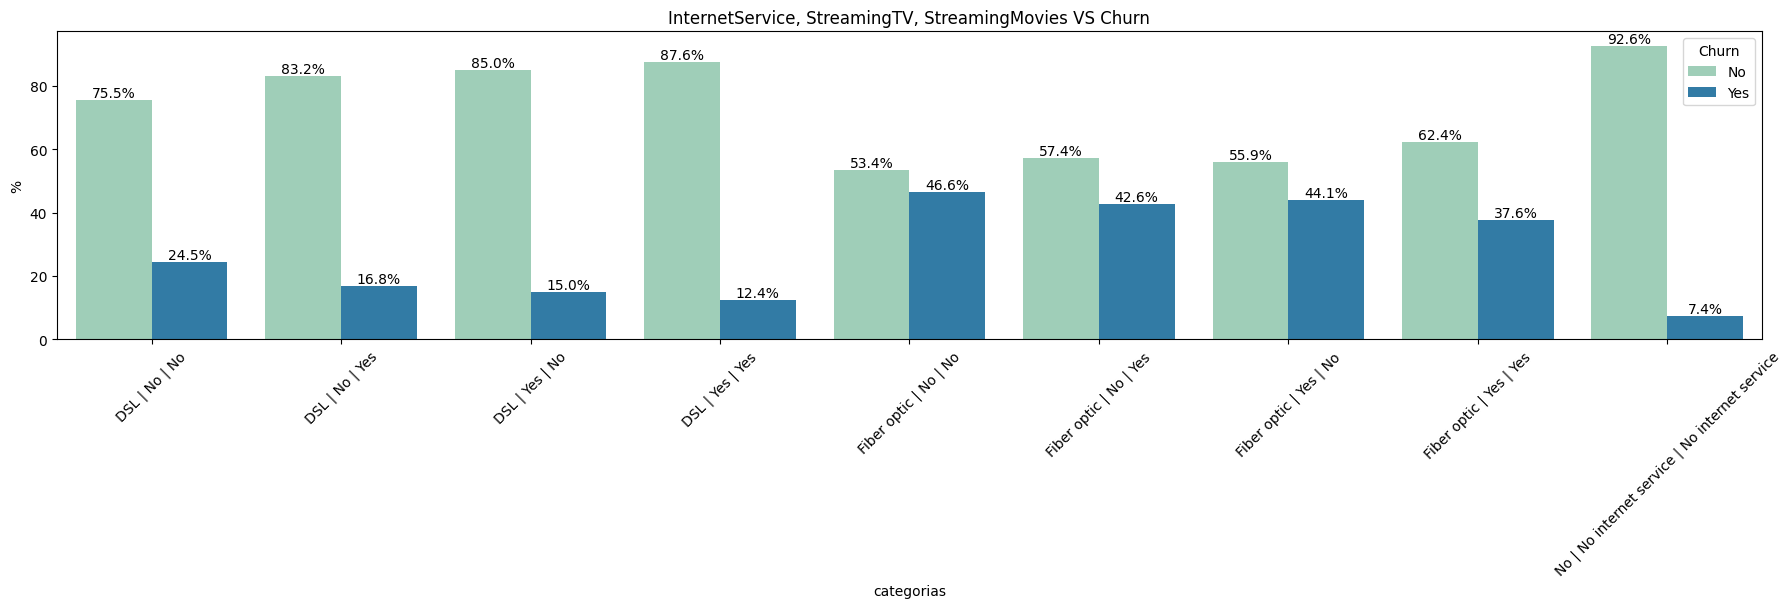

In [32]:
# Tamanho de la figura

plt.figure(figsize=(22,4))

# Agrupamos las categorias que queremos comparar juntas

grupo_2 = df.groupby(['InternetService', 'StreamingTV', 'StreamingMovies', 'Churn']).size().reset_index(name='count')

# Vemos el  peso que representa cada grupo por desertores o clientes fieles

grupo_2['%'] = grupo_2.groupby(['InternetService', 'StreamingTV', 'StreamingMovies'])['count'].transform(lambda x: x / x.sum() * 100)

# Concatenamos los nombres de las categorias

grupo_2['categorias'] = grupo_2['InternetService'] + ' | ' + grupo_2['StreamingTV'] + ' | ' + grupo_2['StreamingMovies']

# Graficamos 

fig_barras = sns.barplot(data=grupo_2,
                         x='categorias',
                         y='%', hue='Churn',
                         palette='YlGnBu')

# Agregamos los lables a cada columna 

for container in fig_barras.containers:
    fig_barras.bar_label(container, fmt='%.1f%%')

plt.title('InternetService, StreamingTV, StreamingMovies VS Churn')
plt.xticks(rotation=45)

plt.show()

Aquí decidimos analizar nuevamente los servicios de internet con las variables: InternetService, StreamingTV y StreamingMovies. Intencionalmente elegimos enfocarnos en el servicio de internet y, efectivamente, observamos que los clientes que utilizan fibra óptica suelen abandonar el servicio con más frecuencia.

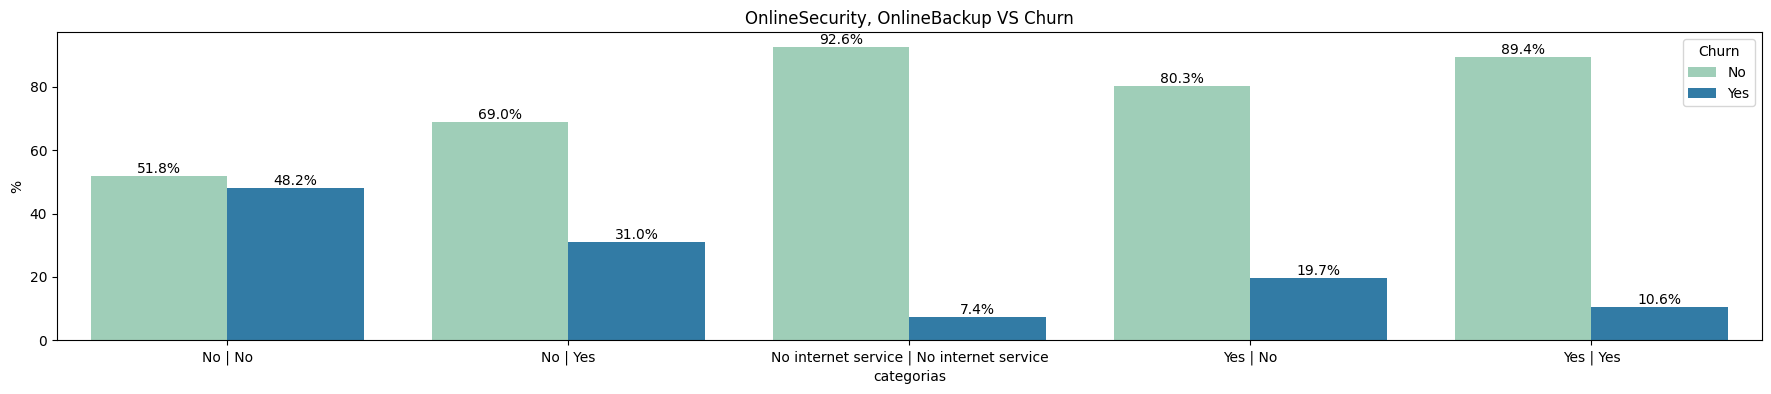

In [33]:
# Tamanho de la figura

plt.figure(figsize=(22,4))

# Agrupamos las categorias que queremos comparar juntas

grupo_3 = df.groupby(['OnlineSecurity', 'OnlineBackup', 'Churn']).size().reset_index(name='count')

# Vemos el  peso que representa cada grupo por desertores o clientes fieles

grupo_3['%'] = grupo_3.groupby(['OnlineSecurity', 'OnlineBackup'])['count'].transform(lambda x: x / x.sum() * 100)

# Concatenamos los nombres de las categorias

grupo_3['categorias'] = grupo_3['OnlineSecurity'] + ' | ' + grupo_3['OnlineBackup']

# Graficamos 

fig_barras = sns.barplot(data=grupo_3,
                         x='categorias',
                         y='%', hue='Churn',
                         palette='YlGnBu')

# Agregamos los lables a cada columna 

for container in fig_barras.containers:
    fig_barras.bar_label(container, fmt='%.1f%%')

plt.title('OnlineSecurity, OnlineBackup VS Churn')

plt.show()

En este gráfico apreciamos que los clientes que no tienen OnlineSecurity ni OnlineBackup no presentan un patrón claro que podamos identificar a simple vista. Sin embargo, notamos que los usuarios que no tienen contratado ninguno de estos servicios muestran una mayor probabilidad de abandonar. Aunque no hay un patrón definido que nos permita tomar una decisión directa, este detalle es importante y vale la pena tenerlo en cuenta.

Como hemos observado un alto impacto en el abandono de clientes que tienen contratada fibra óptica, evaluaremos esta variable en relación con el tiempo de contrato y el precio que pagan mes a mes.

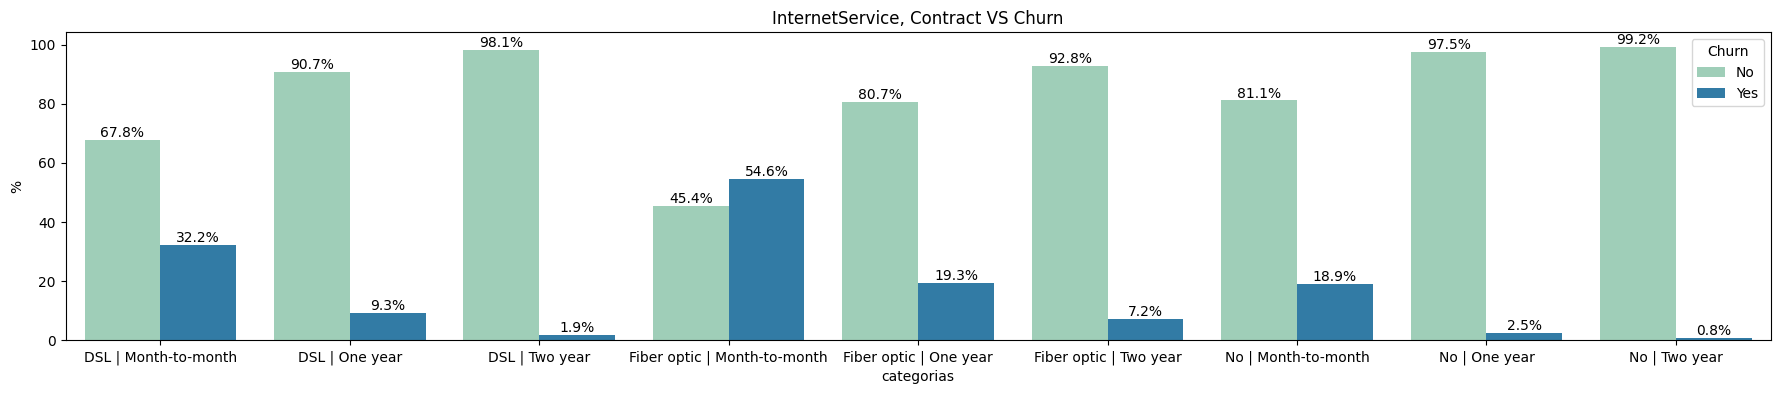

In [34]:
# Tamanho de la figura

plt.figure(figsize=(22,4))

# Agrupamos las categorias que queremos comparar juntas

grupo_3 = df.groupby(['InternetService','Contract', 'Churn']).size().reset_index(name='count')

# Vemos el  peso que representa cada grupo por desertores o clientes fieles

grupo_3['%'] = grupo_3.groupby(['InternetService','Contract'])['count'].transform(lambda x: x / x.sum() * 100)

# Concatenamos los nombres de las categorias

grupo_3['categorias'] = grupo_3['InternetService'] + ' | ' + grupo_3['Contract']

# Graficamos 

fig_barras = sns.barplot(data=grupo_3,
                         x='categorias',
                         y='%', hue='Churn',
                         palette='YlGnBu')

# Agregamos los lables a cada columna 

for container in fig_barras.containers:
    fig_barras.bar_label(container, fmt='%.1f%%')

plt.title('InternetService, Contract VS Churn')

plt.show()

Evaluando únicamente nuestras dos variables: tipo de internet y tiempo de contrato, notamos que los clientes que contratan fibra óptica sin un contrato a largo plazo (solo mes a mes) abandonan con mayor frecuencia. Más de la mitad de estos clientes opta por abandonar el servicio.

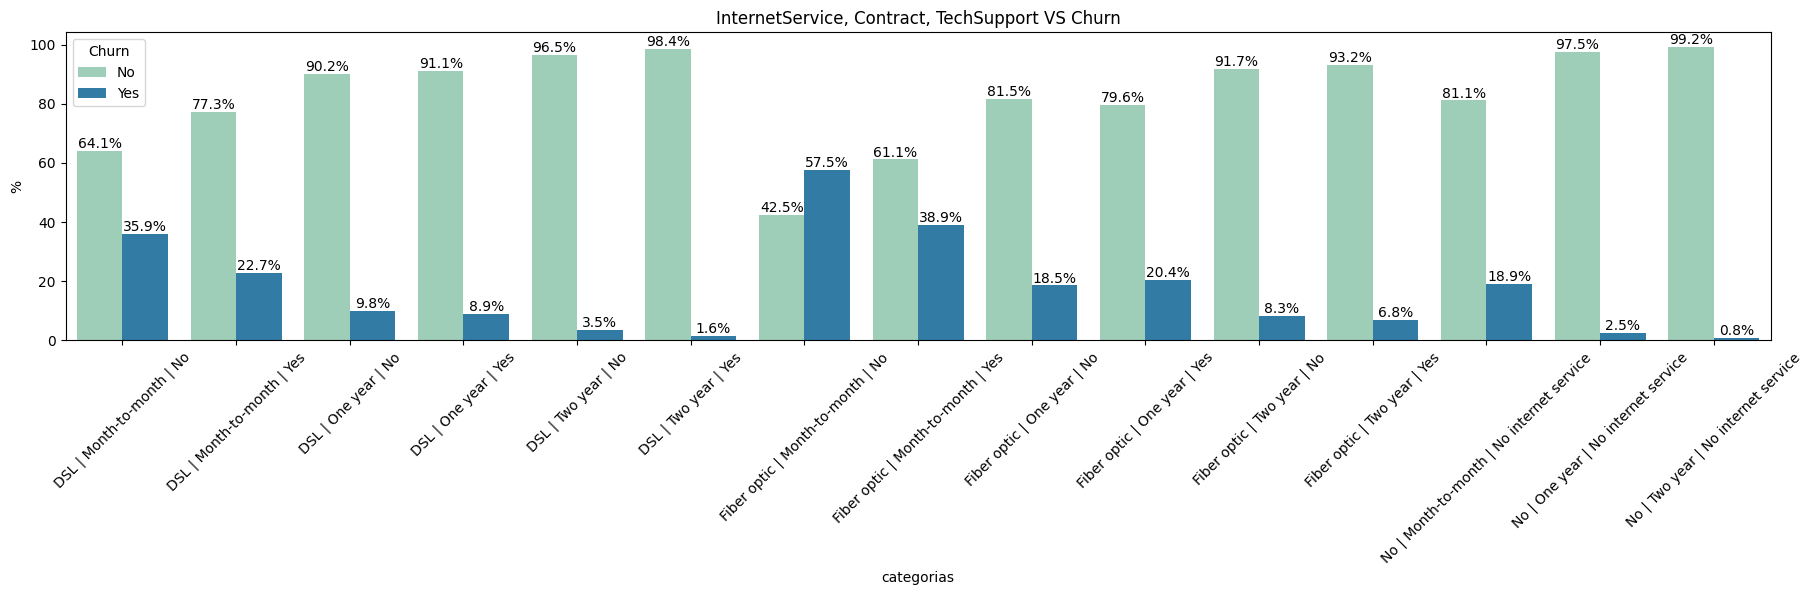

In [35]:
# Tamanho de la figura

plt.figure(figsize=(22,4))

# Agrupamos las categorias que queremos comparar juntas

grupo_3 = df.groupby(['InternetService','Contract','TechSupport', 'Churn']).size().reset_index(name='count')

# Vemos el  peso que representa cada grupo por desertores o clientes fieles

grupo_3['%'] = grupo_3.groupby(['InternetService','Contract','TechSupport'])['count'].transform(lambda x: x / x.sum() * 100)

grupo_3['categorias'] = grupo_3['InternetService'] + ' | ' + grupo_3['Contract']+ ' | ' + grupo_3['TechSupport']

# Graficamos 

fig_barras = sns.barplot(data=grupo_3,
                         x='categorias',
                         y='%', hue='Churn',
                         palette='YlGnBu')

# Agregamos los lables a cada columna 


for container in fig_barras.containers:
    fig_barras.bar_label(container, fmt='%.1f%%')

plt.title('InternetService, Contract, TechSupport VS Churn')
plt.xticks(rotation=45)
plt.show()

Aquí podemos observar más de lo mismo: el abandono de clientes se mantiene alto entre quienes contratan fibra óptica mes a mes. Aunque el hecho de no haber recibido un servicio técnico incrementa ligeramente la tasa de abandono, seguimos viendo que una de las principales causas está relacionada con contratar fibra óptica sin un contrato a largo plazo.



In [36]:
# Creamos un df donde el indice y las columnas sean las variables categoricas 

chi_cuadrado = pd.DataFrame(index = categoricas, columns = categoricas)

In [37]:
# Hacemos un bucle donde nos coloque relacion 1 si la variable coincide  y si no nos devuelva el p valor de las variables

for var1 in categoricas:
    for var2 in categoricas:
        if var1 == var2:
            chi_cuadrado.loc[var1, var2] = 1
        else:
            tabla_contingencia = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
            chi_cuadrado.loc[var1, var2] = p

chi_cuadrado = chi_cuadrado.astype(float)


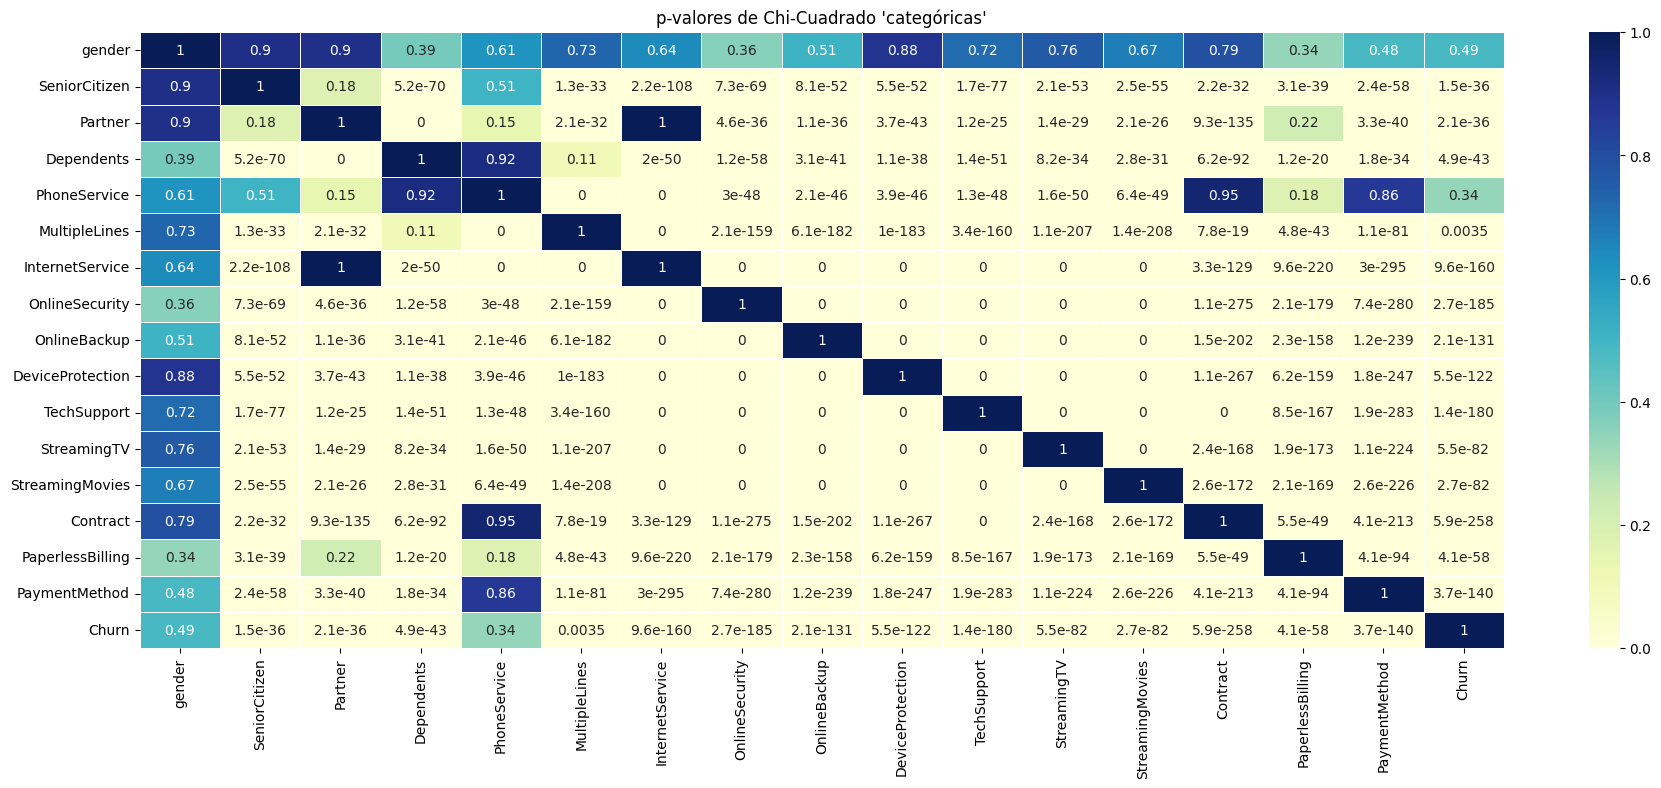

In [38]:
# Tamanho de la figura

plt.figure(figsize=(22,8))

# Creamos el heatmap 

sns.heatmap(chi_cuadrado, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("p-valores de Chi-Cuadrado 'categóricas'")
plt.show()

En esta tabla de calor lo que podemos ver es cómo cada variable está relacionada a través del p-valor.

Como era de esperar, la variable género no aporta mucho en cuanto a la decisión del cliente de abandonar o no, así que podríamos pensar en descartarla. Nos centraremos más que todo en los valores 0, como por ejemplo InternetService, ya que tiene demasiada relación con OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport, y podríamos pensar en eliminarlas para evitar problemas de colinealidad en un futuro al entrenar nuestro modelo.

Por otro lado, enfocándonos en nuestro objetivo o target a predecir, tenemos varias variables como InternetService, Contract, PaperlessBilling, PaperlessBilling, StreamingTV, MultipleLines con el p-valor muy bajo, indicándonos que hay una fuerte relación entre estas variables y el objetico.

# Distribucion de target

Finalmente, ya conocemos un poco más nuestros datos, pero ahora vamos a ver cómo está distribuido nuestro objetivo a predecir, que es 'Churn'.

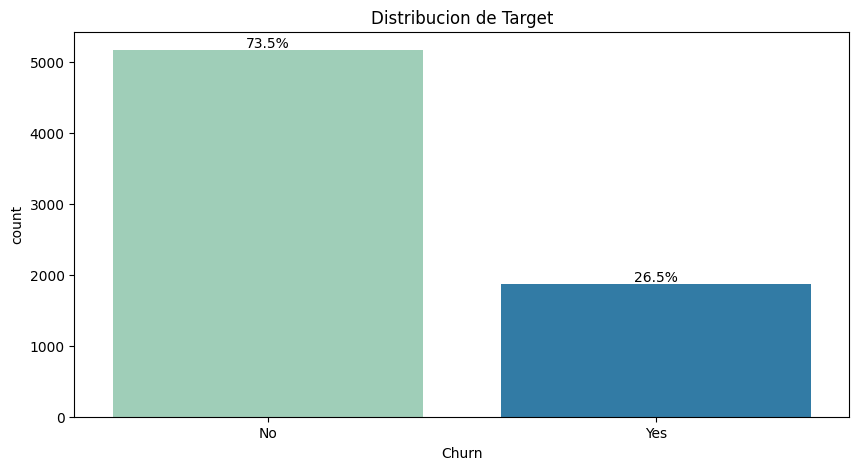

In [39]:
# como esta distribuida nuestra variable 

plt.figure(figsize=(10,5))

target = sns.countplot(data=df, 
                       x='Churn',
                       hue='Churn',
                       palette='YlGnBu')

total = len(df)

for p in target.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    target.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')
    
plt.title('Distribucion de Target')

plt.show()

Vemos que nuestro target está bastante desbalanceado, lo que quiere decir que tendremos que balancearlo para que el modelo que elijamos tenga una mejor predicción.

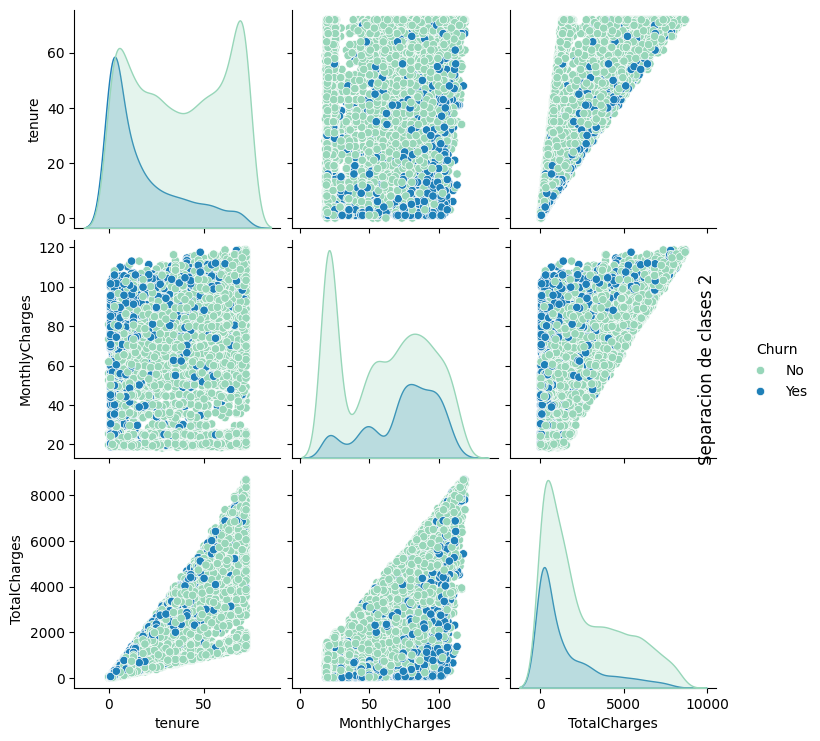

In [40]:
# Analisis multivariado de distribucion de target 

sns.pairplot(df, 
             hue='Churn',
             palette='YlGnBu')

plt.title('Separacion de clases 2',
          rotation='vertical',
          loc='right')


plt.show()

No hay mucha dispersión en los datos, lo cual nos da buenos indicios sobre la relación entre ellos. Como vimos un poco más arriba en nuestros gráficos, la separación de las clases no puede hacerse mediante una línea recta, así que estamos frente a un problema de clasificación no lineal. Por lo tanto, necesitaremos un modelo de clasificación más avanzado para lograr una buena predicción.

# Feature Engine

Creamos una columna con el número de servicios contratados, con la hipótesis de que más servicios podrían significar mayor compromiso y, por lo tanto, menor probabilidad de abandono.

También añadimos una columna que indica si un cliente senior vive solo, con la hipótesis de que los adultos mayores sin apoyo familiar podrían tener un comportamiento distinto, posiblemente con mayor propensión a abandonar

In [41]:
# Contamos los clientes que tienen mas de un servicio activo 

servicios = ['PhoneService','InternetService','OnlineSecurity','OnlineBackup','StreamingTV','StreamingMovies']

df['num_servicios'] = df[servicios].apply(lambda row: sum(row != 'No'), axis=1)

In [42]:
# Vlolvemos a cambiar nuestras columnas target y SeniorCitizen a numerico  como lo teniamos originalmente

dicc = {'No': 0,
        'Yes':1}


df['SeniorCitizen'] = df['SeniorCitizen'].map(dicc).astype(int)

df['Churn'] = df['Churn'].map(dicc).astype(int)

In [43]:
# Vemos  si las personas de 3ra edad tienen pareja 

df['senior_sin_partner'] = df.apply(lambda x: 1 if x['SeniorCitizen'] == 1 and x['Partner'] == 'No' and x['Dependents'] == 'No' else 0, axis=1)

## Resumen de exploracion

Evaluando nuestro dataset observamos y limpiamos todos los detalles básicos, conociendo la distribución de todos los factores que pueden llevar a que nuestros clientes abandonen nuestros servicios. Nos dimos cuenta de patrones importantes y debilidades en algunos de nuestros servicios, como la fibra óptica y el servicio técnico.

También encontramos un patrón en los clientes que abandonan: suelen ser personas con contratos cortos, mes a mes. Evaluamos cuál era la proporción de clientes que abandonan los servicios en comparación con nuestros clientes fieles, y descubrimos que el 26.5% corresponde a clientes que abandonan.

## Conclusion de nuestra exploracion y estrategia para evitar fuga de clietes

Durante el trayecto del análisis exploratorio, pudimos concluir que una de las estrategias para frenar la fuga de clientes es ofrecer un mejor servicio en la fibra óptica, junto a un servicio técnico más atento. Además, sería clave ofrecer contratos de mayor duración, quizás manteniendo los precios, ya que esto también está relacionado con un patrón de abandono en personas jubiladas o de la tercera edad.

## Conclusion para la preparacion de nuestro modelo de Maching learning 

Tenemos datos categóricos en nuestro dataset, lo cual nos lleva a implementar un modelo de clasificación supervisado. Los datos no presentan una distribución lineal, por lo que nos enfocaremos en modelos con buen rendimiento en problemas no lineales.

Nos basaremos en métricas de evaluación como:

AUC-ROC, que nos da la capacidad de distinguir entre las dos clases.
F1-Score, ya que ofrece un equilibrio entre precisión y recall.
Aunque también podríamos sustituir el F1-Score por precision y Recall, para observar mejor la precisión y evaluar los falsos negativos.

Resumen:

- Nuestra variable a predecir es de tipo categórica.
- El modelo será un modelo de clasificación.
- Estará enfocado en la predicción de datos no lineales.
- Tenemos un target bastante desbalanceado, por lo que debemos aplicar técnicas de balanceo.
- Métricas de evaluación: precision , AUC-ROC y Recall.

In [ ]:
# Exportamos

df.to_parquet('telecom_limpio.parquet',index=True)